In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('height-weight.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'height-weight.csv'

In [59]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Weight')

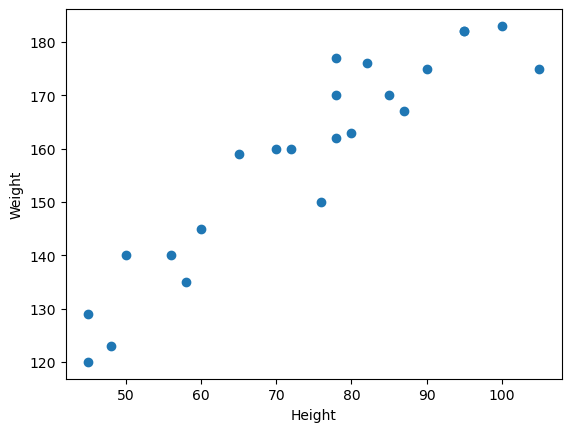

In [60]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Height")
plt.ylabel("Weight")

In [61]:
##Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


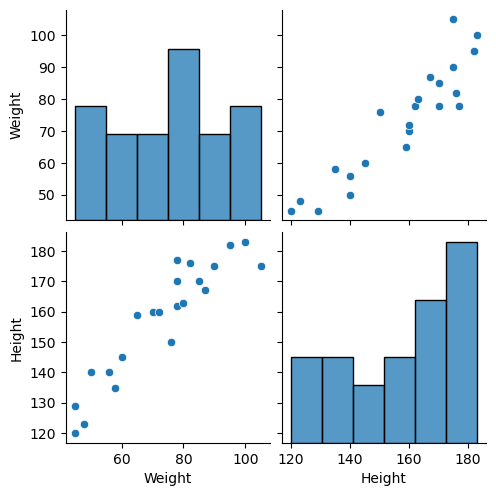

In [62]:
##Seaborn for visulization
import seaborn as sns
sns.pairplot(df)

In [63]:
##Independent and dependent features
X=df[['Weight']]###independent features should be dataframe or 2 dimesion 
##X.head()
y=df['Height']##This variable can be in series of 1d array

In [64]:
X_series=df['Weight']##1 dimensional array 
np.array(X).shape

(23, 1)

In [65]:
np.array(y).shape

(23,)

In [66]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [67]:
X_train.shape

(17, 1)

In [68]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [69]:
X_test = scaler.transform(X_test) 

In [70]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [71]:
## apply simple linerar regression
from sklearn.linear_model import LinearRegression

In [72]:
regression = LinearRegression(n_jobs=-1)

In [73]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [74]:
print("Coefficient or slope :",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope : [17.2982057]
Intercept: 156.47058823529412


In [4]:
##plot training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

NameError: name 'X_train' is not defined

In [76]:
##predection of test data
##1.predection height output = intercept +coef_(weight)
##2.y_pred_test = 156.470+17.29(X_test)

In [77]:
##prdection for test data
y_pred=regression.predict(X_test)

In [78]:
## performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [79]:
mse = mean_squared_error(y_test,y_pred);
mae = mean_absolute_error(y_test,y_pred);
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


114.84069295228699
9.66512588679501
10.716374991212605


 R square 
 formula 
 r^2 = 1-ssr/sst
 r^2=coefficient of determination ssr = sum of squared of residuals sst =total sum of squares

In [80]:
from sklearn.metrics import r2_score

In [81]:
score = r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [82]:
##display adjusted R-square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [95]:
## OLs linear regression

import statsmodels.api as sm


In [96]:
model = sm.OLS(y_train,X_train).fit()

In [99]:
predection = model.predict(X_test)
print(predection)




[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [1]:
print(model.summary())

NameError: name 'model' is not defined

In [106]:
## predection for new data
regression.predict(scaler.transform([[72]]))

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])